# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sinasc = pd.read_csv('/content/SINASC_RO_2019.csv')
sinasc

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [19]:
sinasc['GESTACAO'].fillna(method='ffill', inplace=True)
sinasc['GESTACAO'].isna().sum()

0

In [31]:
sinasc['GESTACAO'] = sinasc['GESTACAO'].apply(lambda value: value.replace('semanas', '').replace('a', '-').replace('e mais', '+').replace('Menos de', '-').replace(' ', ''))
sinasc['GESTACAO'].value_counts()

37-41    23646
32-36     2379
42+        727
28-31      177
22-27       90
-22          9
Name: GESTACAO, dtype: int64

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

<Axes: xlabel='APGAR1'>

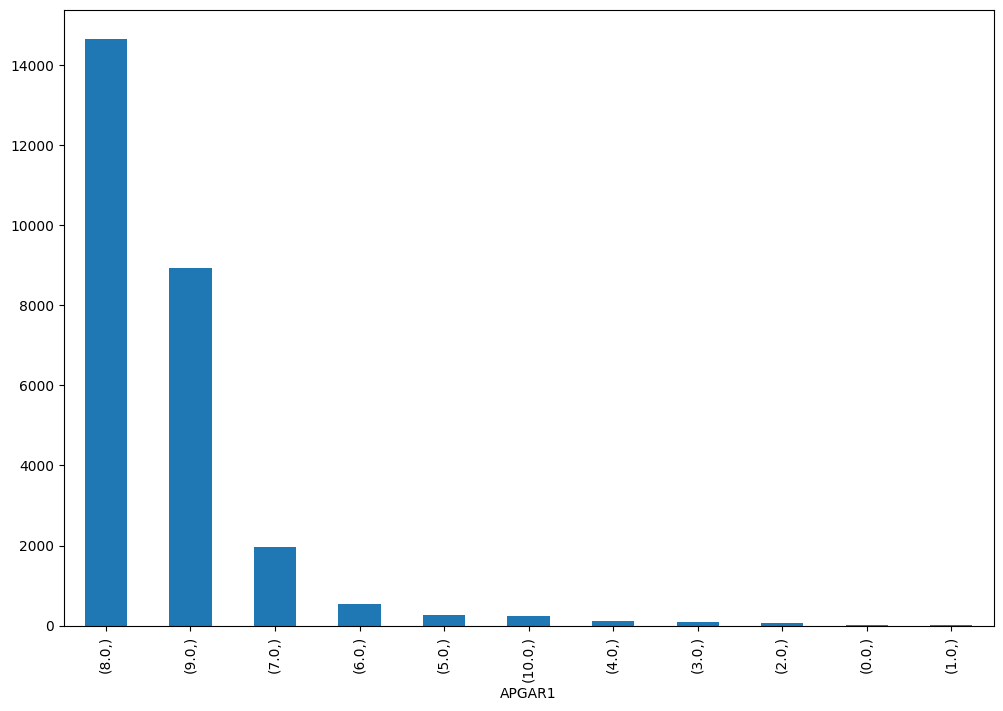

In [36]:
sinasc[['APGAR1']].value_counts().plot.bar()

<Axes: xlabel='APGAR5'>

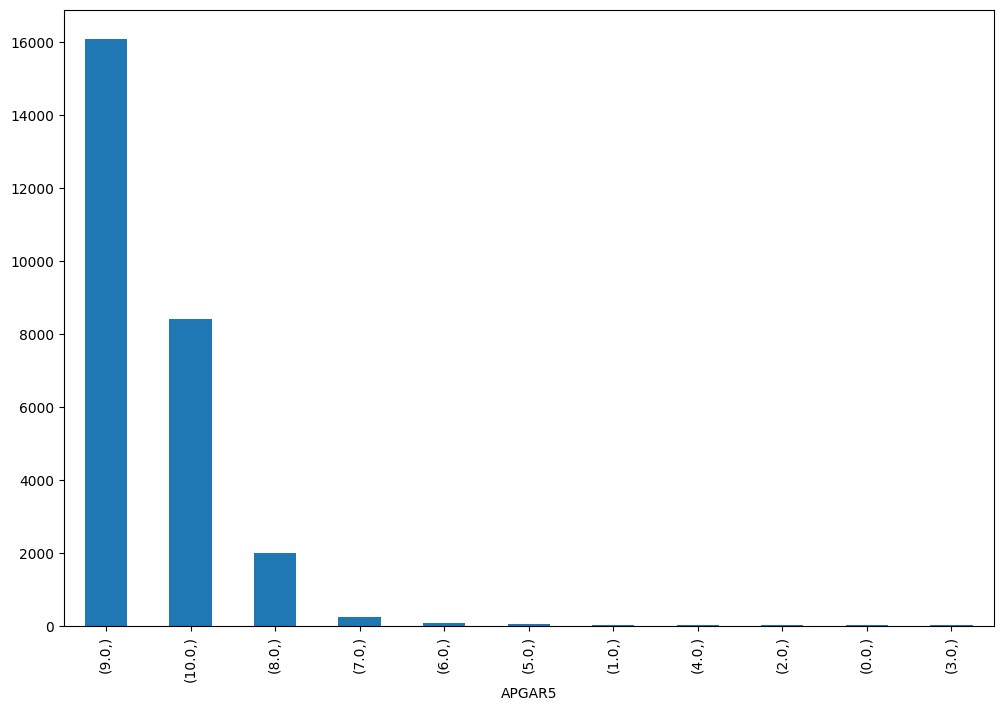

In [37]:
sinasc[['APGAR5']].value_counts().plot.bar()

<Axes: xlabel='SEXO'>

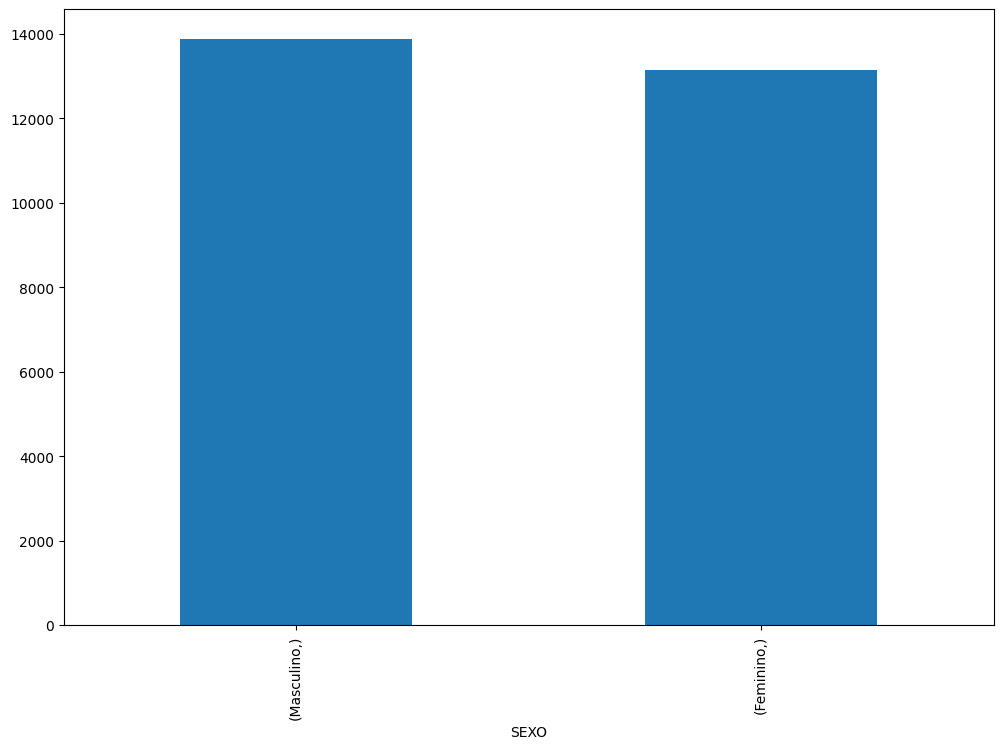

In [38]:
sinasc[['SEXO']].value_counts().plot.bar()

<Axes: xlabel='GESTACAO'>

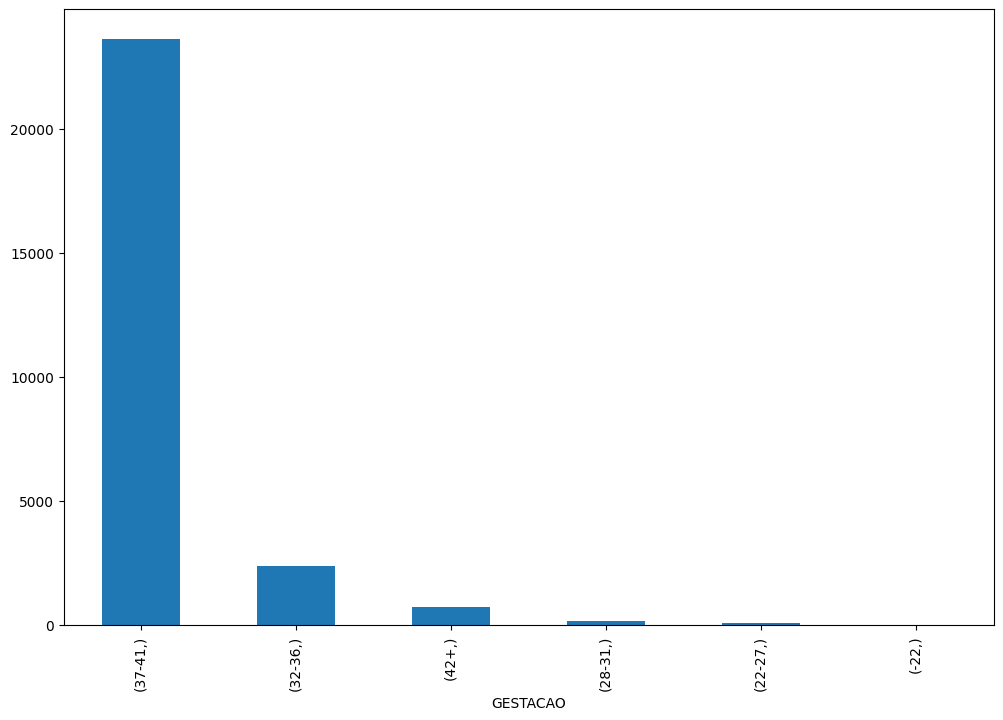

In [39]:
sinasc[['GESTACAO']].value_counts().plot.bar()

<Axes: xlabel='ESTCIVMAE'>

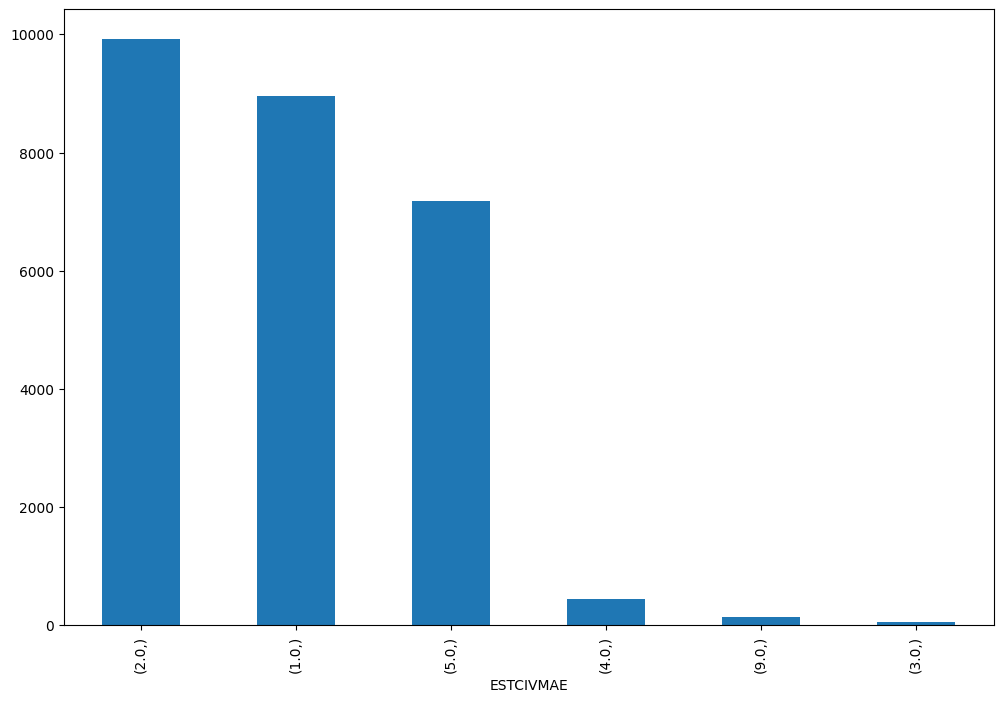

In [40]:
sinasc[['ESTCIVMAE']].value_counts().plot.bar()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

<Axes: xlabel='APGAR5', ylabel='CONSULTAS'>

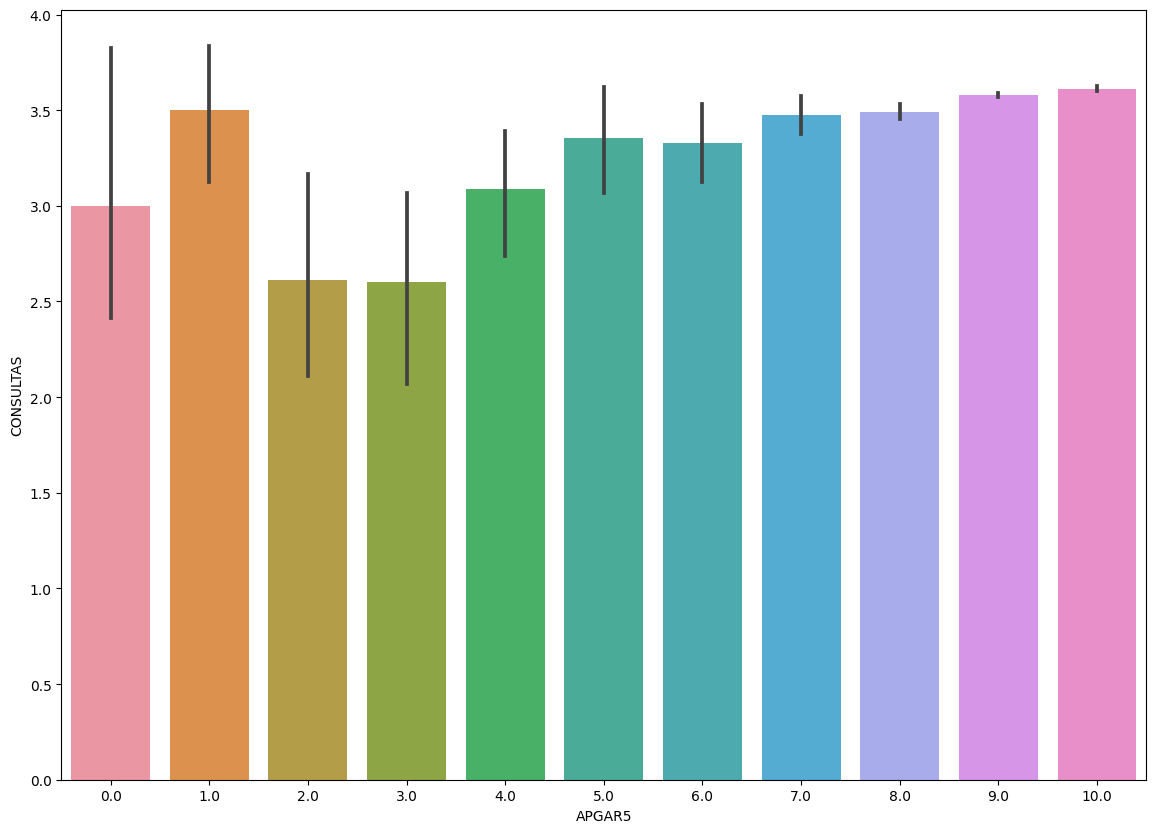

In [29]:
sns.barplot(x='APGAR5', y='CONSULTAS', data=sinasc)

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

<Axes: xlabel='ESTCIVMAE', ylabel='count'>

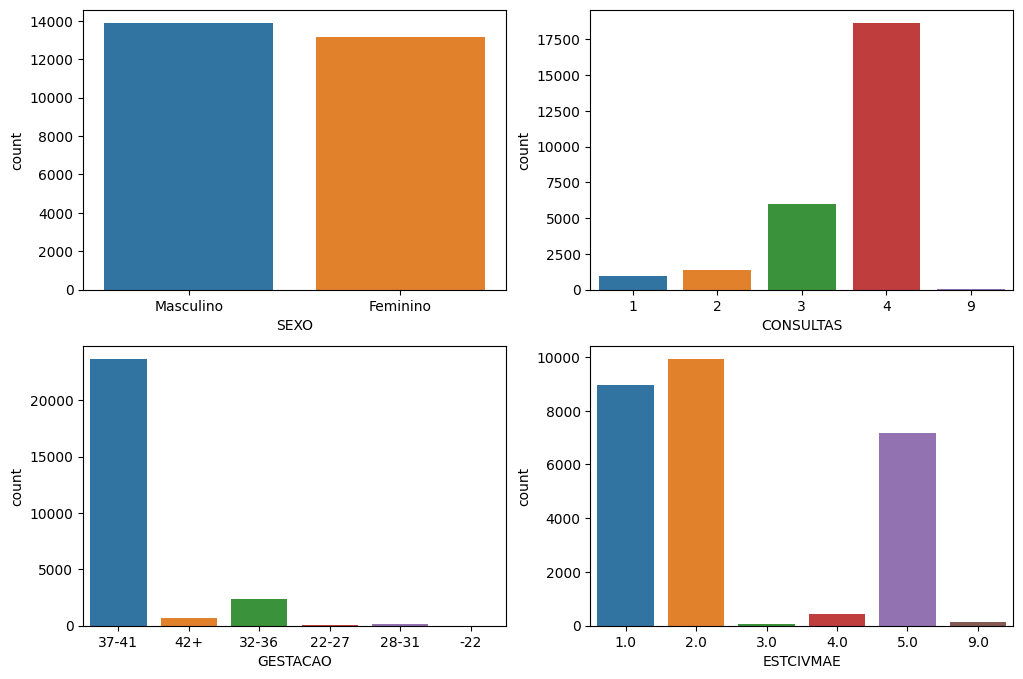

In [30]:
plt.rc('figure', figsize=(12, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax = axes[0, 0], x='SEXO', data=sinasc)
sns.countplot(ax = axes[0, 1], x='CONSULTAS', data=sinasc)
sns.countplot(ax = axes[1, 0], x='GESTACAO', data=sinasc)
sns.countplot(ax = axes[1, 1], x='ESTCIVMAE', data=sinasc)